# Books Analysis
This dataset scraped from: http://books.toscrape.com/catalogue/category/books_1/index.html

**Questions:**
1. What is the books price distrubution (min, max, mean).
2. What is the books rate distrubution.
3. List the books categories sorted accending. 
4. What is the most expensive book that has rate 5 and what is its category.
5. How much the store gain from each category.
6. How much the store gain from all category (Romance, Music).
7. List how many books have price between 15 and 30.
8. How many books found for each rate for each category.
9. How much the store gain for each rate for each category.
10. What are the 5 most expensive books for Mystery category.
11. Does the eate affects the price.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize' : [9, 9]}, font_scale=1.2)

In [2]:
df = pd.read_csv('Books.csv')
df

,Book_Name,Book_Ratting,Book_Price,Book_Category
0,Sharp Objects,Four,47.82,Mystery
1,"In a Dark, Dark Wood",One,19.63,Mystery
2,The Past Never Ends,Four,56.50,Mystery
3,A Murder in Time,One,16.64,Mystery
4,The Murder of Roger Ackroyd (Hercule Poirot #4),Four,44.10,Mystery
...,...,...,...,...
501,Why the Right Went Wrong: Conservatism--From G...,Four,52.65,Politics
502,Equal Is Unfair: America's Misguided Fight Aga...,One,56.86,Politics
503,Amid the Chaos,One,36.58,Cultural
504,Dark Notes,Five,19.19,Erotica


### Explatory Data Analysis
**Feature Engineering**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Book_Name      506 non-null    object 
 1   Book_Ratting   506 non-null    object 
 2   Book_Price     506 non-null    float64
 3   Book_Category  506 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.9+ KB


In [4]:
df['Book_Ratting'].unique()

array(['Four', 'One', 'Two', 'Five', 'Three'], dtype=object)

In [5]:
df['Book_Ratting'].value_counts()

One      120
Five     103
Two      102
Three     95
Four      86
Name: Book_Ratting, dtype: int64

In [6]:
def fix_rate(rate):
    try:
        if rate == 'One': return int(1)
        elif rate == 'Two': return int(2)
        elif rate == 'Three': return int(3)
        elif rate == 'Four': return int(4)
        else: return int(5)
    except:
        return np.nan
df['Book_Ratting'] = df['Book_Ratting'].apply(fix_rate)

In [7]:
df['Book_Ratting'].value_counts()

1    120
5    103
2    102
3     95
4     86
Name: Book_Ratting, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Book_Name      506 non-null    object 
 1   Book_Ratting   506 non-null    int64  
 2   Book_Price     506 non-null    float64
 3   Book_Category  506 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.9+ KB


**Notes:** 
1. All features are now in correct type no change in types of features
2. No extract features can be done in this features

### Data Preprocessing and ETL

**Check missing values**

In [9]:
df.isna().sum()

Book_Name        0
Book_Ratting     0
Book_Price       0
Book_Category    0
dtype: int64

**Note:** No missing values in our dataset

**Check outliers**

<AxesSubplot:xlabel='Book_Price'>

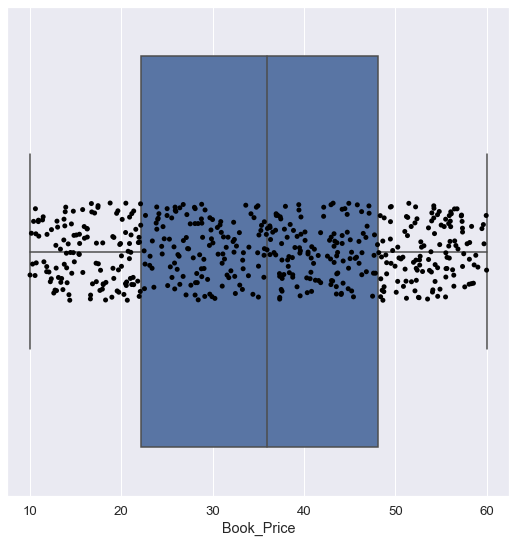

In [10]:
sns.boxplot(x = 'Book_Price', data = df)
sns.stripplot(x = 'Book_Price', data = df, color='#0000')

In [11]:
from datasist.structdata import detect_outliers
idx_outlier = detect_outliers(df, 0, ['Book_Price'])
idx_outlier

[]

**Note:** From our vizualization and detect_outliers function there is no ourliers to handle

### Data Analysis

#### 1. What is the books price distrubution (min, max, mean).

In [12]:
pd.DataFrame(df['Book_Price'].describe())

,Book_Price
count,506.000000
mean,35.217688
std,14.407411
min,10.010000
25%,22.115000
50%,35.920000
75%,48.155000
max,59.990000


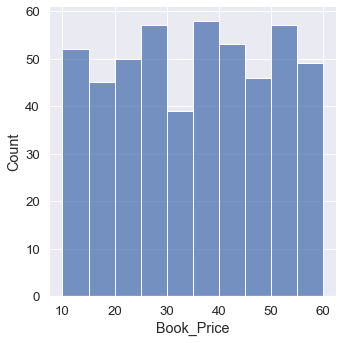

In [13]:
sns.displot(x = 'Book_Price', data = df)

<AxesSubplot:xlabel='Book_Price', ylabel='Density'>

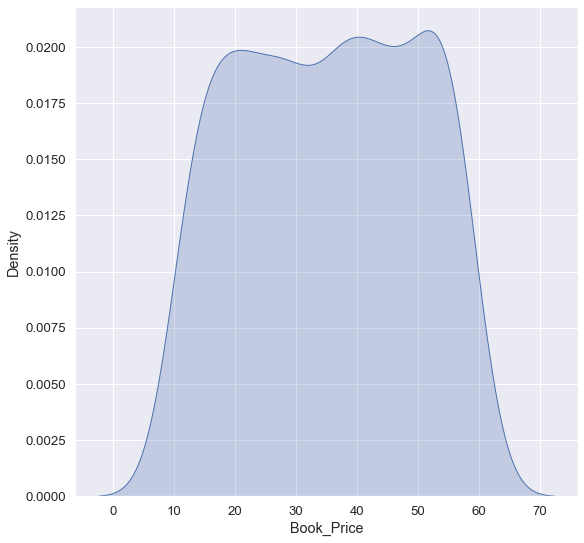

In [14]:
sns.kdeplot(x = 'Book_Price', data = df, shade = True)

**Notes:**
1. **Min Price of a book is:** 10 USD
2. **Mean Price of a book is:** 35 USD
3. **Max Price of a book is:** 60 USD

That's Not bad for a small library and our dataset

**Min book price**

In [15]:
df[df['Book_Price'] == df['Book_Price'].min()]

,Book_Name,Book_Ratting,Book_Price,Book_Category
320,The Origin of Species,4,10.01,Science


**Max book price**

In [16]:
df[df['Book_Price'] == df['Book_Price'].max()]

,Book_Name,Book_Ratting,Book_Price,Book_Category
107,The Perfect Play (Play by Play #1),3,59.99,Romance


#### 2. What is the books rate distrubution.


In [17]:
pd.DataFrame(df['Book_Ratting'].describe())

,Book_Ratting
count,506.000000
mean,2.901186
std,1.459051
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


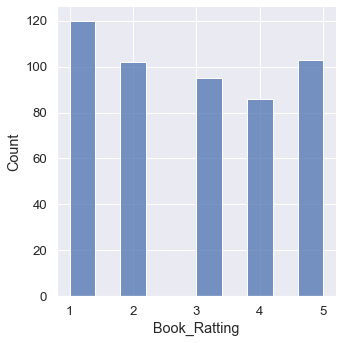

In [18]:
sns.displot(x = 'Book_Ratting', data = df)

<AxesSubplot:xlabel='Book_Ratting', ylabel='Density'>

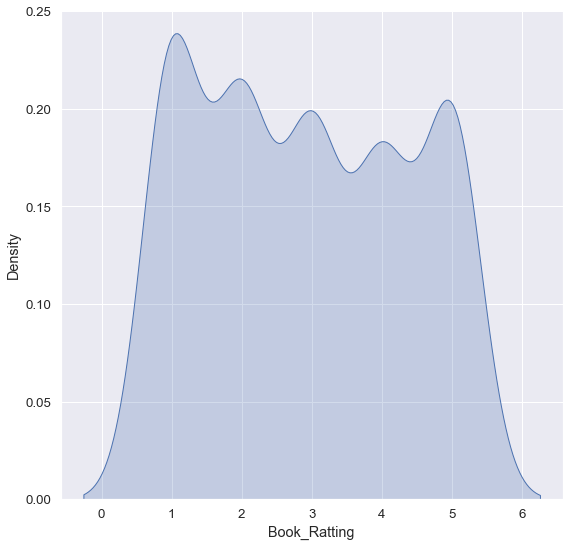

In [19]:
sns.kdeplot(x = 'Book_Ratting', data = df, shade = True)

<AxesSubplot:xlabel='Book_Ratting', ylabel='count'>

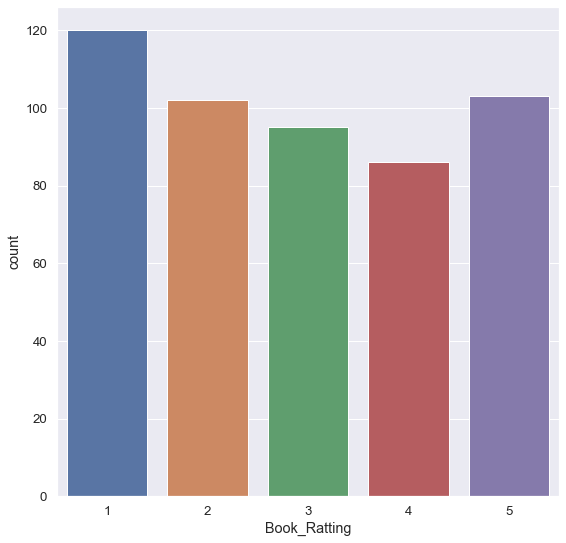

In [20]:
sns.countplot(x = 'Book_Ratting', data = df)

**Notes:**
1. **Min rate book is:** 1 of 5
2. **About mean:** this library doesn't count on have rate so we can't depend on this mean value they use only int nums for ratting their books. 
3. **Max rate book is:** 5 of 5
4. From ploting we see that the most frequent rate is 1 and the lowest is 4

Let's see these rows

**Min rate books**

In [21]:
df[df['Book_Ratting'] == df['Book_Ratting'].min()]

,Book_Name,Book_Ratting,Book_Price,Book_Category
1,"In a Dark, Dark Wood",1,19.63,Mystery
3,A Murder in Time,1,16.64,Mystery
6,That Darkness (Gardiner and Renner #1),1,13.92,Mystery
7,Tastes Like Fear (DI Marnie Rome #3),1,10.69,Mystery
13,Hide Away (Eve Duncan #20),1,11.84,Mystery
...,...,...,...,...
492,Blue Like Jazz: Nonreligious Thoughts on Chris...,1,25.77,Christian
494,The Grownup,1,35.88,ShortStories
502,Equal Is Unfair: America's Misguided Fight Aga...,1,56.86,Politics
503,Amid the Chaos,1,36.58,Cultural


**Max rate books**

In [22]:
df[df['Book_Ratting'] == df['Book_Ratting'].max()]

,Book_Name,Book_Ratting,Book_Price,Book_Category
8,A Time of Torment (Charlie Parker #14),5,48.35,Mystery
17,What Happened on Beale Street (Secrets of the ...,5,25.37,Mystery
18,The Bachelor Girl's Guide to Murder (Herringfo...,5,52.30,Mystery
22,A Flight of Arrows (The Pathfinders #2),5,55.53,HistoricalFiction
24,Mrs. Houdini,5,30.25,HistoricalFiction
...,...,...,...,...
490,(Un)Qualified: How God Uses Broken People to D...,5,54.00,Christian
495,Suzie Snowflake: One beautiful flake (a self-e...,5,54.81,Novels
498,10-Day Green Smoothie Cleanse: Lose Up to 15 P...,5,49.71,Health
499,The Art and Science of Low Carbohydrate Living,5,52.98,Health


#### 3. List the books categories sorted accending. 

In [23]:
new_df = df
new_df = new_df.set_index(['Book_Category'])
new_df = new_df.sort_index(axis = 0, ascending=True)
new_df

,Book_Name,Book_Ratting,Book_Price
Book_Category,,,
Academic,Logan Kade (Fallen Crest High #5.5),2,13.12
Addacomment,Judo: Seven Steps to Black Belt (an Introducto...,2,53.90
Addacomment,A Brush of Wings (Angels Walking #3),1,55.51
Addacomment,A People's History of the United States,2,40.79
Addacomment,Angels Walking (Angels Walking #1),2,34.20
...,...,...,...
YoungAdult,Aristotle and Dante Discover the Secrets of th...,4,58.14
YoungAdult,The Epidemic (The Program 0.6),5,14.44
YoungAdult,Stars Above (The Lunar Chronicles #4.5),2,48.05


#### 4. What is the most expensive book that has rate 5 and what is its category.

In [24]:
df_rate_5 = df[df['Book_Ratting'] == 5]
df_rate_5.sort_values('Book_Price', ascending=False)

,Book_Name,Book_Ratting,Book_Price,Book_Category
370,Life Without a Recipe,5,59.04,Autobiography
366,Approval Junkie: Adventures in Caring Too Much,5,58.81,Autobiography
315,Immunity: How Elie Metchnikoff Changed the Cou...,5,57.36,Science
324,The Disappearing Spoon: And Other True Tales o...,5,57.35,Science
218,"A Piece of Sky, a Grain of Rice: A Memoir in F...",5,56.76,Default
...,...,...,...,...
270,Princess Between Worlds (Wide-Awake Princess #5),5,13.34,Fantasy
152,Walt Disney's Alice in Wonderland,5,12.96,Childrens
446,The Third Wave: An Entrepreneur’s Vision of th...,5,12.61,Business
375,Old School (Diary of a Wimpy Kid #10),5,11.83,Humor


In [25]:
df_rate_5[df_rate_5['Book_Price'] == df_rate_5['Book_Price'].max()]

,Book_Name,Book_Ratting,Book_Price,Book_Category
370,Life Without a Recipe,5,59.04,Autobiography


**Note:** This is the most expensive book that has rate 5 and it's category is 'Autobiography'

#### 5. How much the store gain from each category.

In [26]:
price = df.groupby('Book_Category')['Book_Price'].sum()
price

Book_Category
Academic              13.12
Addacomment          692.86
AdultFiction          15.36
Art                  308.16
Autobiography        333.48
Biography            168.31
Business             389.52
Childrens            728.05
Christian            127.49
ChristianFiction     206.31
Classics             694.36
Contemporary         108.60
Crime                 10.97
Cultural              36.58
Default              700.48
Erotica               19.19
Fantasy              793.08
Fiction              753.93
FoodandDrink         627.98
Health               205.81
Historical            45.66
HistoricalFiction    707.58
History              671.31
Horror               611.14
Humor                335.01
Music                463.28
Mystery              655.88
NewAdult             278.30
Nonfiction           653.80
Novels                54.81
Paranormal            15.40
Parenting             37.35
Philosophy           369.14
Poetry               683.51
Politics             160.84
Psycho

#### 6. How much the store gain from all category (Romance, Music).

In [27]:
df[df['Book_Category'].isin(['Romance', 'Music'])].iloc[:, -2].sum()

1084.04

**Note:** That's what library gain from only these categories (1084.04 USD)

#### 7. List how many books have price between 15 and 30.

In [28]:
df[df['Book_Price'].between(15, 30)].count()[0]

152

**Note:** We have 152 book between 15 and 30 USD

#### 8. How many books found for each rate for each category.

In [29]:
books_num = pd.pivot_table(data = df, index = 'Book_Category', columns='Book_Ratting', values = 'Book_Price', aggfunc='count')
books_num

Book_Ratting,1,2,3,4,5
Book_Category,,,,,
Academic,NaN,1.0,NaN,NaN,NaN
Addacomment,4.0,6.0,3.0,4.0,3.0
AdultFiction,NaN,NaN,NaN,NaN,1.0
Art,NaN,1.0,2.0,4.0,1.0
Autobiography,2.0,3.0,NaN,1.0,3.0
Biography,1.0,2.0,2.0,NaN,NaN
Business,3.0,2.0,3.0,1.0,3.0
Childrens,6.0,3.0,6.0,2.0,3.0
Christian,1.0,1.0,NaN,NaN,1.0


#### 9. How much the store gain for each rate for each category.

In [30]:
books_p = pd.pivot_table(index = 'Book_Category', columns = 'Book_Ratting', values = 'Book_Price', aggfunc='sum', data=df)
books_p

Book_Ratting,1,2,3,4,5
Book_Category,,,,,
Academic,NaN,13.12,NaN,NaN,NaN
Addacomment,149.58,263.65,83.89,104.17,91.57
AdultFiction,NaN,NaN,NaN,NaN,15.36
Art,NaN,32.34,92.07,144.24,39.51
Autobiography,68.03,80.40,NaN,12.91,172.14
Biography,39.55,38.00,90.76,NaN,NaN
Business,131.79,68.87,82.47,33.34,73.05
Childrens,221.79,74.77,254.57,94.04,82.88
Christian,25.77,47.72,NaN,NaN,54.00


#### 10. What are the 5 most expensive books for Mystery category.

In [31]:
df[df['Book_Category'] == 'Mystery'].sort_values('Book_Price', ascending=False).head(5)

,Book_Name,Book_Ratting,Book_Price,Book_Category
14,Boar Island (Anna Pigeon #19),3,59.48,Mystery
2,The Past Never Ends,4,56.50,Mystery
11,Murder at the 42nd Street Library (Raymond Amb...,4,54.36,Mystery
5,The Last Mile (Amos Decker #2),2,54.21,Mystery
18,The Bachelor Girl's Guide to Murder (Herringfo...,5,52.30,Mystery


#### 11. Does the rate affects the price.

<AxesSubplot:>

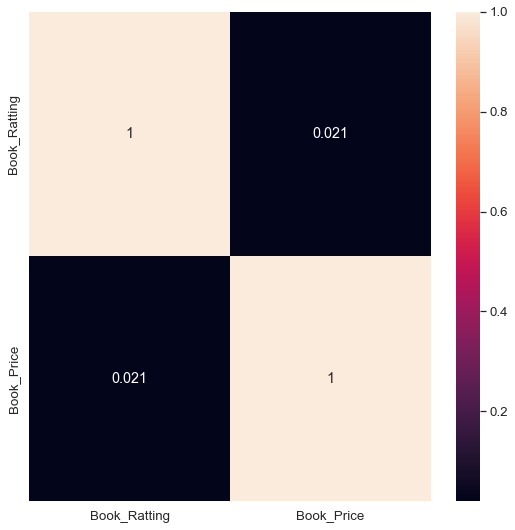

In [32]:
sns.heatmap(df.corr(), annot=True)

**Note:** The correlation between price and rate is very weak, almost no correlation.